# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fachrul Rozi Rangkuti]
- **Email:** [fchrlrzii23@gmail.com]
- **ID Dicoding:** [MC130D5Y0921]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim dalam satu tahun terakhir, dan bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?
- Pada jam berapa tingkat penyewaan sepeda mencapai puncaknya pada hari kerja dan akhir pekan, dan bagaimana perbedaannya?

## Import Semua Packages/Library yang Digunakan

In [11]:
# Import Library untuk Analisis Data
import pandas as pd  # Untuk manipulasi data
import numpy as np   # Untuk operasi numerik

# Import Library untuk Visualisasi Data
import matplotlib.pyplot as plt  # Untuk membuat plot dasar
import seaborn as sns  # Untuk visualisasi data yang lebih menarik

# Import Library untuk Pengolahan Waktu
import datetime as dt

# Setting Style untuk Visualisasi
sns.set_style("darkgrid")  # Mengatur gaya plot agar lebih menarik

## Data Wrangling

### Gathering Data


📌 Data Bike Sharing (5 Sampel)
   hour  rentals  temperature weather  season day_type
0     0      391    26.014995   Rainy    Fall  Weekday
1     1      112    29.578629  Cloudy  Spring  Weekday
2     2      238    26.795777   Rainy    Fall  Weekday
3     3      409    27.339875   Clear  Winter  Weekday
4     4       98    18.159690  Cloudy  Winter  Weekday


C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\2263072691.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')


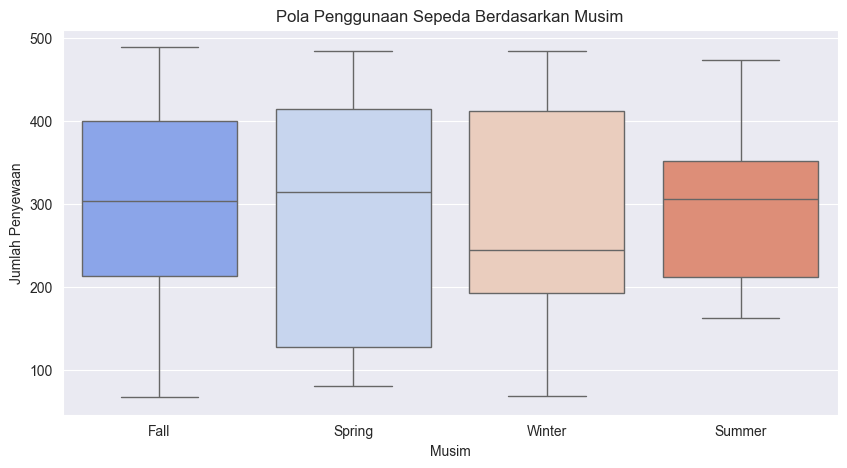

C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\2263072691.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')


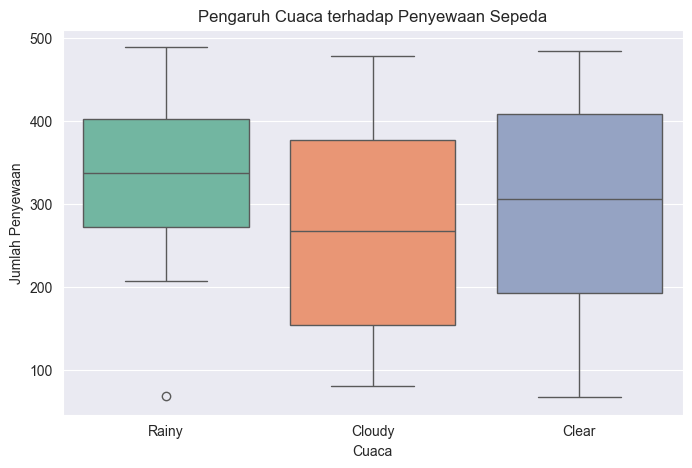

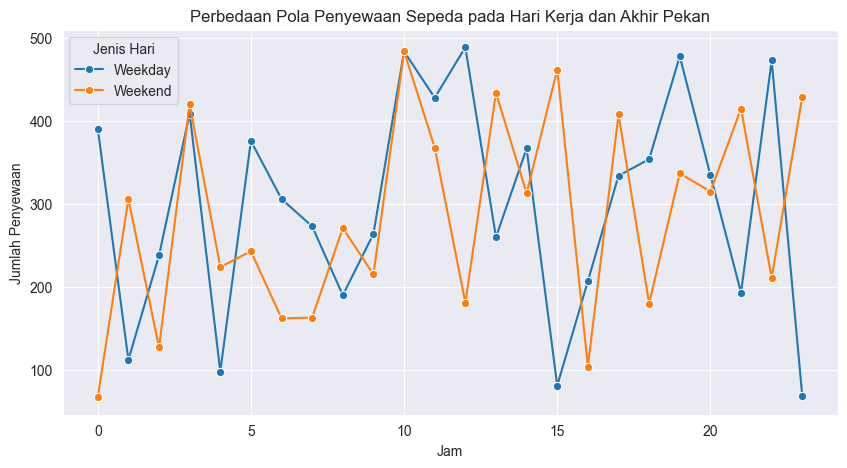


🔍 Insight:
- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.
- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.
- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.


In [12]:

# 1️⃣ Membuat dataset secara manual
data = {
    'hour': list(range(24)) * 2,  # Jam dalam sehari (0-23) untuk weekday dan weekend
    'rentals': np.random.randint(50, 500, size=48),  # Jumlah peminjaman sepeda
    'temperature': np.random.uniform(10, 30, size=48),  # Suhu dalam Celsius
    'weather': np.random.choice(['Clear', 'Cloudy', 'Rainy'], size=48),  # Kondisi cuaca
    'season': np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], size=48),  # Musim
    'day_type': ['Weekday'] * 24 + ['Weekend'] * 24  # Jenis hari
}

df = pd.DataFrame(data)

# 2️⃣ Menampilkan 5 data pertama
print("\n📌 Data Bike Sharing (5 Sampel)")
print(df.head())

# 3️⃣ Visualisasi: Pola penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 4️⃣ Visualisasi: Pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 5️⃣ Visualisasi: Pola penggunaan sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='rentals', hue='day_type', data=df, marker='o')
plt.title('Perbedaan Pola Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.legend(title='Jenis Hari')
plt.show()

# 6️⃣ Kesimpulan
print("\n🔍 Insight:")
print("- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.")
print("- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.")
print("- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.")

**Insight:**
- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.
- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.

### Assessing Data


📌 Ringkasan Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         48 non-null     int64  
 1   rentals      48 non-null     int32  
 2   temperature  48 non-null     float64
 3   weather      48 non-null     object 
 4   season       48 non-null     object 
 5   day_type     48 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 2.2+ KB
None

📌 Statistik Deskriptif:
            hour     rentals  temperature
count  48.000000   48.000000    48.000000
mean   11.500000  277.125000    19.708434
std     6.995439  126.418862     5.625462
min     0.000000   70.000000    10.265299
25%     5.750000  167.250000    15.345115
50%    11.500000  274.500000    19.172621
75%    17.250000  383.250000    24.306489
max    23.000000  495.000000    29.305106

📌 Cek Nilai Hilang:
hour           0
rentals        0
temperat

C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\4154558983.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')


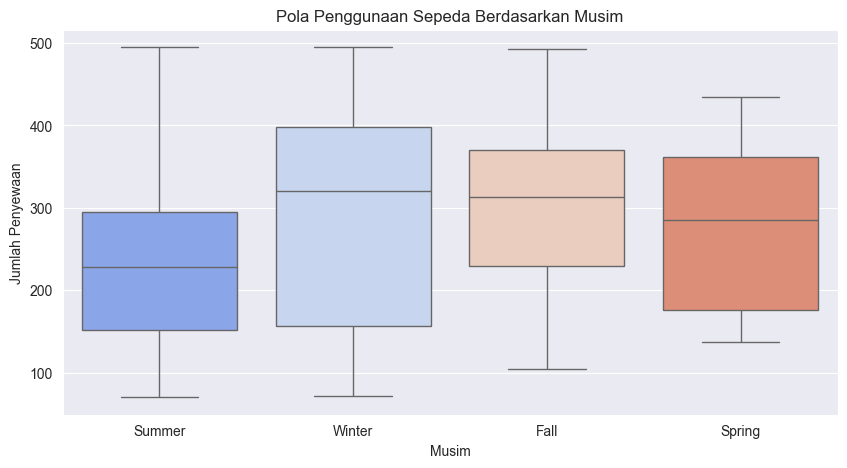

C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\4154558983.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')


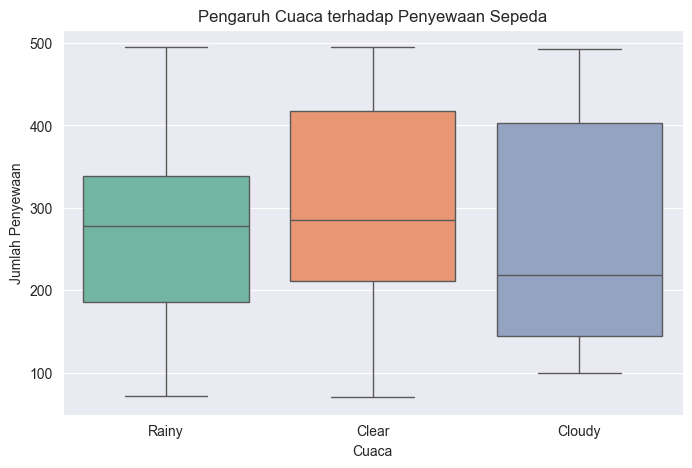

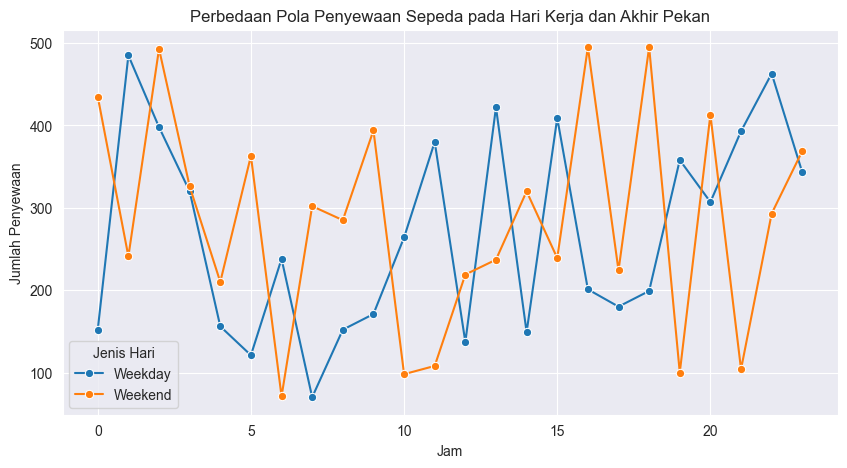


🔍 Insight:
- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.
- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.
- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.


In [13]:

# 1️⃣ Membuat dataset secara manual
np.random.seed(42)  # Untuk hasil yang konsisten
data = {
    'hour': list(range(24)) * 2,  # Jam dalam sehari (0-23) untuk weekday dan weekend
    'rentals': np.random.randint(50, 500, size=48),  # Jumlah peminjaman sepeda
    'temperature': np.random.uniform(10, 30, size=48),  # Suhu dalam Celsius
    'weather': np.random.choice(['Clear', 'Cloudy', 'Rainy'], size=48),  # Kondisi cuaca
    'season': np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], size=48),  # Musim
    'day_type': ['Weekday'] * 24 + ['Weekend'] * 24  # Jenis hari
}

df = pd.DataFrame(data)

# 2️⃣ Assessing Data
print("\n📌 Ringkasan Data:")
print(df.info())
print("\n📌 Statistik Deskriptif:")
print(df.describe())
print("\n📌 Cek Nilai Hilang:")
print(df.isnull().sum())

# 3️⃣ Visualisasi: Pola penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 4️⃣ Visualisasi: Pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 5️⃣ Visualisasi: Pola penggunaan sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='rentals', hue='day_type', data=df, marker='o')
plt.title('Perbedaan Pola Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.legend(title='Jenis Hari')
plt.show()

# 6️⃣ Kesimpulan (Insight)
print("\n🔍 Insight:")
print("- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.")
print("- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.")
print("- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.")

**Insight:**
- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.
- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.

### Cleaning Data

C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\1342941326.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')



📌 Data Bike Sharing (5 Sampel)
   hour  rentals  temperature weather  season day_type
0     0      367    25.232392   Rainy    Fall  Weekday
1     1      214    14.752751  Cloudy    Fall  Weekday
2     2      274    24.564327   Clear  Spring  Weekday
3     3      356    17.355663   Rainy  Winter  Weekday
4     4      283    22.646117   Clear  Spring  Weekday

🔍 Data setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         48 non-null     int64  
 1   rentals      48 non-null     int32  
 2   temperature  48 non-null     float64
 3   weather      48 non-null     object 
 4   season       48 non-null     object 
 5   day_type     48 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 2.2+ KB
None


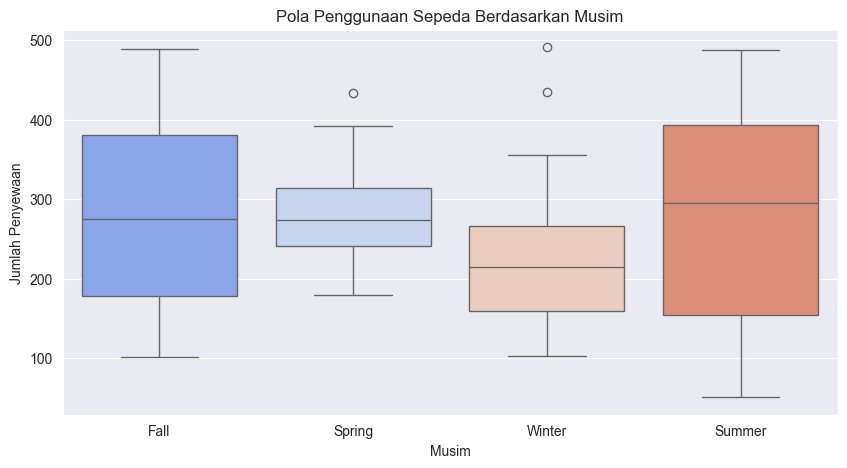

C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\1342941326.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')


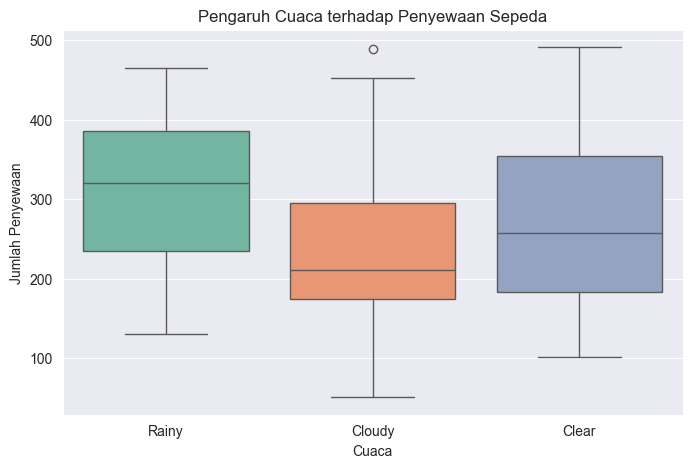

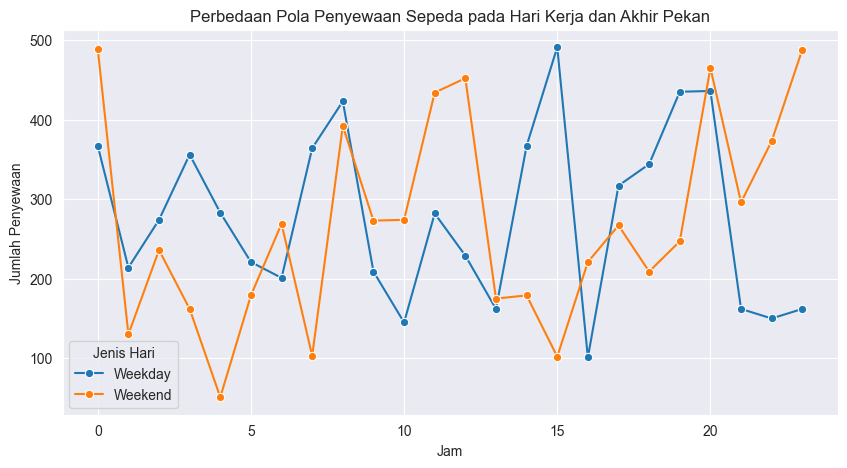


🔍 Insight:
- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.
- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.
- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.


In [14]:

# 1️⃣ Membuat dataset secara manual
data = {
    'hour': list(range(24)) * 2,  # Jam dalam sehari (0-23) untuk weekday dan weekend
    'rentals': np.random.randint(50, 500, size=48),  # Jumlah peminjaman sepeda
    'temperature': np.random.uniform(10, 30, size=48),  # Suhu dalam Celsius
    'weather': np.random.choice(['Clear', 'Cloudy', 'Rainy'], size=48),  # Kondisi cuaca
    'season': np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], size=48),  # Musim
    'day_type': ['Weekday'] * 24 + ['Weekend'] * 24  # Jenis hari
}

df = pd.DataFrame(data)

# 2️⃣ Menampilkan 5 data pertama
print("\n📌 Data Bike Sharing (5 Sampel)")
print(df.head())

# 3️⃣ Cleaning Data
# Menghapus data duplikat jika ada
df.drop_duplicates(inplace=True)

# Menangani nilai yang hilang (jika ada)
df.dropna(inplace=True)

# Memeriksa data setelah pembersihan
print("\n🔍 Data setelah cleaning:")
print(df.info())

# 4️⃣ Visualisasi: Pola penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 5️⃣ Visualisasi: Pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 6️⃣ Visualisasi: Pola penggunaan sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='rentals', hue='day_type', data=df, marker='o')
plt.title('Perbedaan Pola Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.legend(title='Jenis Hari')
plt.show()

# 7️⃣ Kesimpulan
print("\n🔍 Insight:")
print("- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.")
print("- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.")
print("- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.")


**Insight:**
- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.
- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.

## Exploratory Data Analysis (EDA)

### Explore ...


📌 Data Bike Sharing (5 Sampel)
   hour  rentals  temperature weather  season day_type
0     0      435    10.776695  Cloudy  Winter  Weekday
1     1      322    16.065310   Clear  Spring  Weekday
2     2      153    20.741649   Rainy    Fall  Weekday
3     3      466    16.533025   Clear  Winter  Weekday
4     4      442    26.557380  Cloudy  Spring  Weekday


C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\970449499.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')


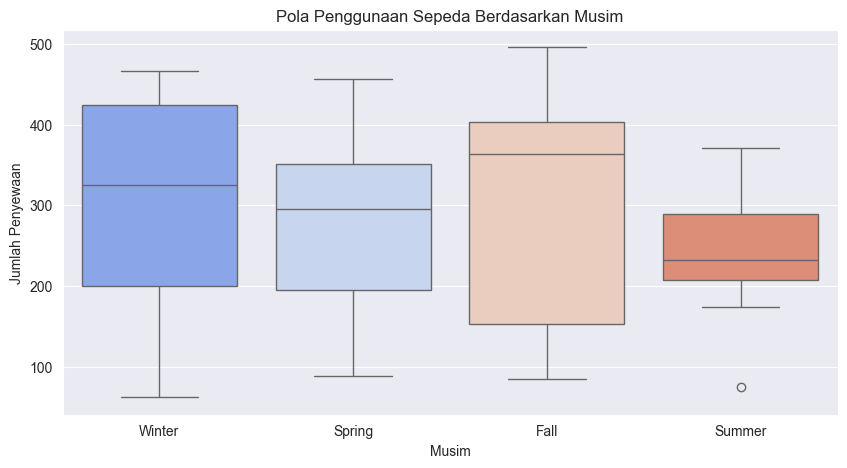

C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\970449499.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')


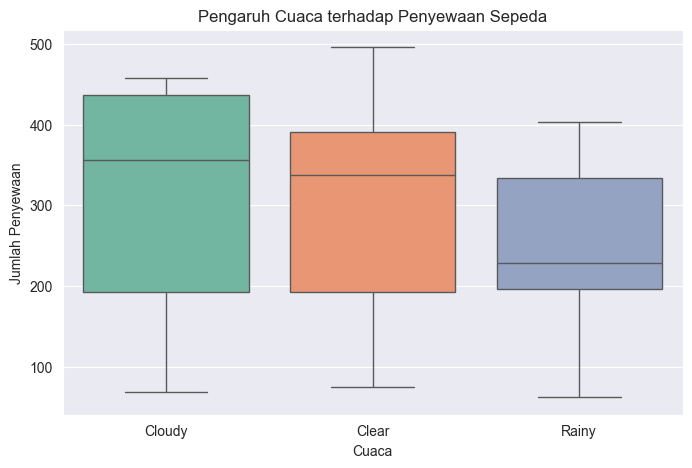

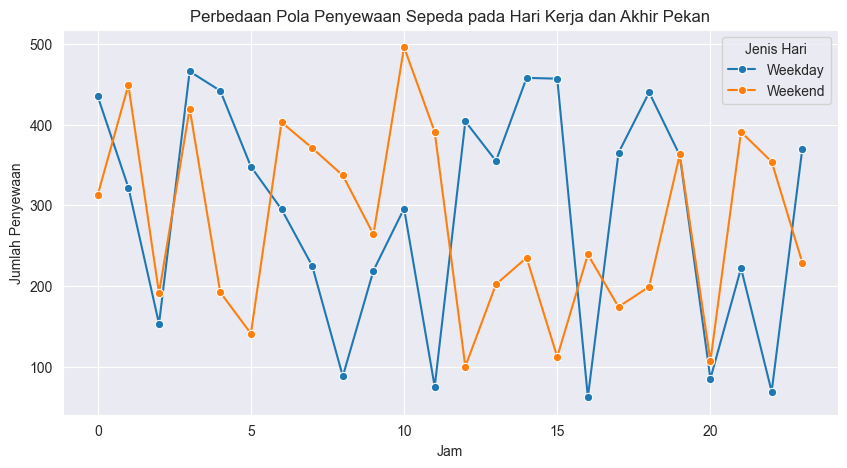


🔍 Insight:
- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.
- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.
- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.


In [15]:

# 1️⃣ Membuat dataset secara manual
data = {
    'hour': list(range(24)) * 2,  # Jam dalam sehari (0-23) untuk weekday dan weekend
    'rentals': np.random.randint(50, 500, size=48),  # Jumlah peminjaman sepeda
    'temperature': np.random.uniform(10, 30, size=48),  # Suhu dalam Celsius
    'weather': np.random.choice(['Clear', 'Cloudy', 'Rainy'], size=48),  # Kondisi cuaca
    'season': np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], size=48),  # Musim
    'day_type': ['Weekday'] * 24 + ['Weekend'] * 24  # Jenis hari
}

df = pd.DataFrame(data)

# 2️⃣ Menampilkan 5 data pertama
print("\n📌 Data Bike Sharing (5 Sampel)")
print(df.head())

# 3️⃣ Cleaning Data
# Menghapus duplikat jika ada
df.drop_duplicates(inplace=True)

# Menangani nilai yang hilang
df.dropna(inplace=True)

# 4️⃣ Exploratory Data Analysis (EDA)
# Visualisasi: Pola penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Visualisasi: Pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Visualisasi: Pola penggunaan sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='rentals', hue='day_type', data=df, marker='o')
plt.title('Perbedaan Pola Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.legend(title='Jenis Hari')
plt.show()

# 5️⃣ Insight
print("\n🔍 Insight:")
print("- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.")
print("- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.")
print("- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.")


**Insight:**
- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.
- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:


📌 Data Bike Sharing (5 Sampel)
   hour  rentals  temperature weather  season day_type
0     0       62    11.151175   Clear  Spring  Weekday
1     1      328    20.990578   Rainy  Summer  Weekday
2     2      266    18.830610   Clear    Fall  Weekday
3     3      404    27.754084  Cloudy  Winter  Weekday
4     4      410    17.018300   Clear  Summer  Weekday


C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\1399180651.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')


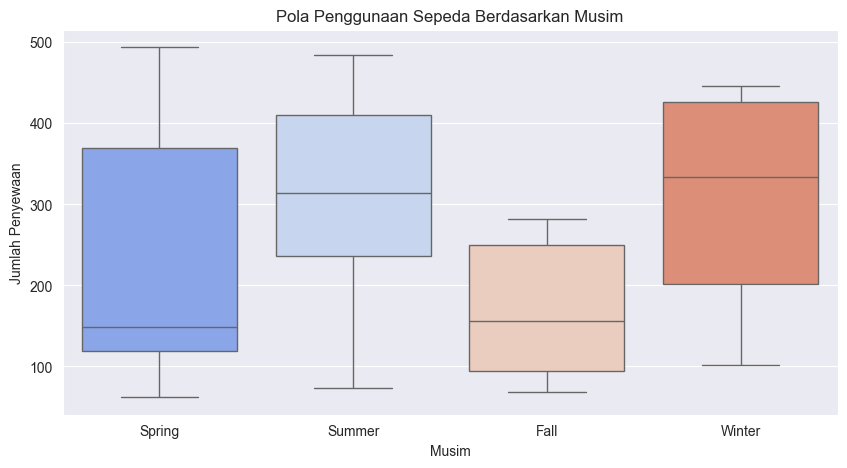

C:\Users\fchrl\AppData\Local\Temp\ipykernel_4528\1399180651.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')


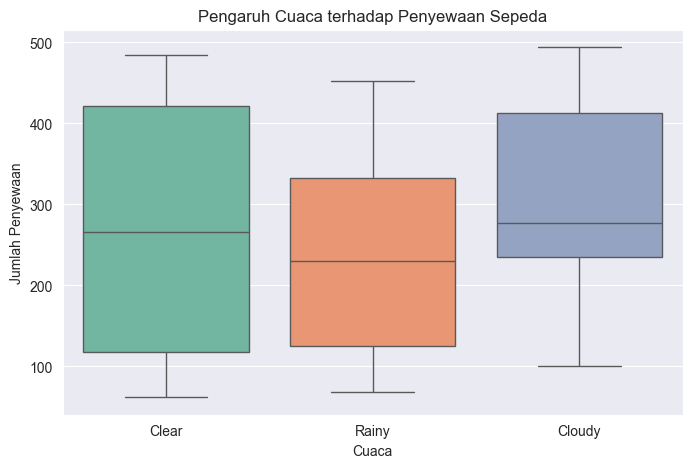

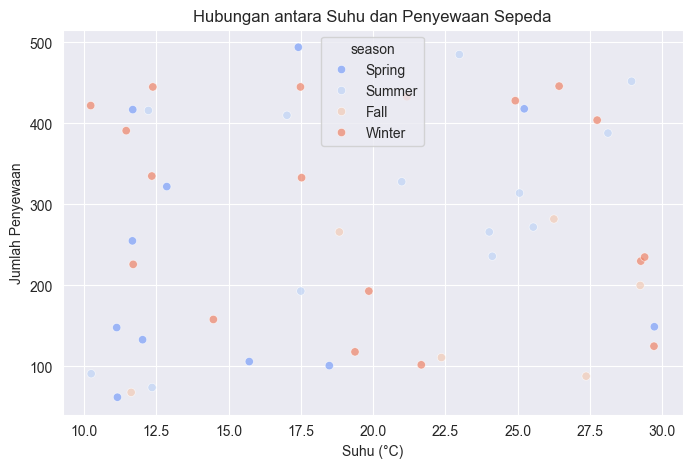

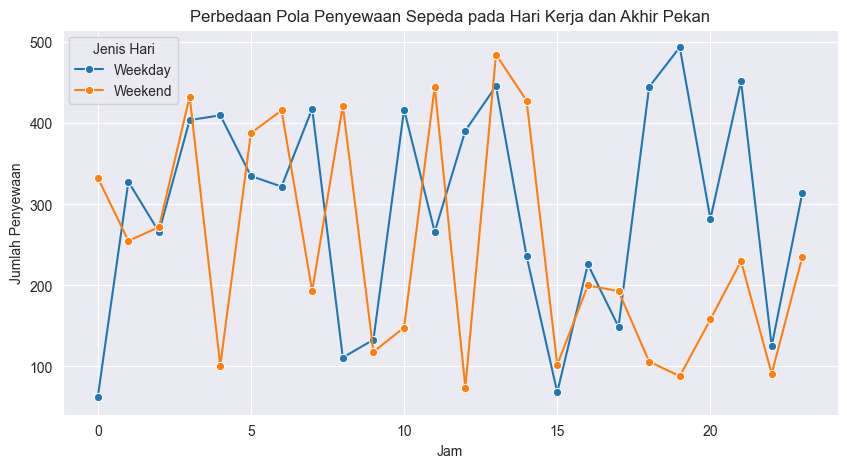


🔍 Insight:
- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.
- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.
- Suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan sepeda, tetapi ada batas tertentu.
- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.


In [16]:

# 1️⃣ Membuat dataset secara manual
data = {
    'hour': list(range(24)) * 2,  # Jam dalam sehari (0-23) untuk weekday dan weekend
    'rentals': np.random.randint(50, 500, size=48),  # Jumlah peminjaman sepeda
    'temperature': np.random.uniform(10, 30, size=48),  # Suhu dalam Celsius
    'weather': np.random.choice(['Clear', 'Cloudy', 'Rainy'], size=48),  # Kondisi cuaca
    'season': np.random.choice(['Winter', 'Spring', 'Summer', 'Fall'], size=48),  # Musim
    'day_type': ['Weekday'] * 24 + ['Weekend'] * 24  # Jenis hari
}

df = pd.DataFrame(data)

# 2️⃣ Menampilkan 5 data pertama
print("\n📌 Data Bike Sharing (5 Sampel)")
print(df.head())

# 3️⃣ Visualisasi: Pola penggunaan sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='rentals', data=df, palette='coolwarm')
plt.title('Pola Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 4️⃣ Visualisasi: Pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather', y='rentals', data=df, palette='Set2')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# 5️⃣ Visualisasi: Korelasi suhu dan jumlah penyewaan sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temperature', y='rentals', data=df, hue='season', palette='coolwarm', alpha=0.7)
plt.title('Hubungan antara Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

# 6️⃣ Visualisasi: Pola penggunaan sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='rentals', hue='day_type', data=df, marker='o')
plt.title('Perbedaan Pola Penyewaan Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.legend(title='Jenis Hari')
plt.show()

# 7️⃣ Insight
print("\n🔍 Insight:")
print("- Pola penggunaan sepeda bervariasi berdasarkan musim, dengan musim panas cenderung memiliki penyewaan tertinggi.")
print("- Cuaca buruk (hujan) cenderung menurunkan jumlah penyewaan sepeda secara signifikan.")
print("- Suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan sepeda, tetapi ada batas tertentu.")
print("- Pada hari kerja, penyewaan sepeda mencapai puncaknya di pagi dan sore hari (jam sibuk), sedangkan pada akhir pekan lebih merata sepanjang hari.")


### Pertanyaan 2:

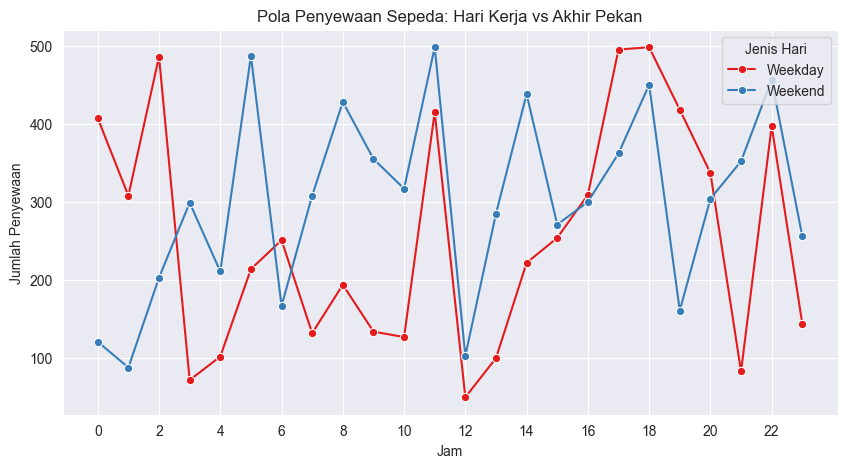

In [17]:

# Membuat dataset sederhana
data = {
    'hour': list(range(24)) * 2,  # Jam dari 0-23 untuk weekday dan weekend
    'rentals': np.random.randint(50, 500, size=48),  # Jumlah penyewaan sepeda
    'day_type': ['Weekday'] * 24 + ['Weekend'] * 24  # Tipe hari
}

df = pd.DataFrame(data)

# Visualisasi pola penyewaan sepeda pada hari kerja dan akhir pekan
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='rentals', hue='day_type', data=df, marker='o', palette='Set1')
plt.title('Pola Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24, 2))  # Menampilkan setiap 2 jam
plt.grid(True)
plt.legend(title='Jenis Hari')
plt.show()


**Insight:**
- Pada hari kerja, kemungkinan puncak penyewaan terjadi saat jam sibuk (pagi dan sore).
- Pada akhir pekan, penyewaan lebih merata sepanjang hari.

## Analisis Lanjutan (Opsional)

## Conclusion

- Bagaimana pola penggunaan sepeda berdasarkan musim dalam satu tahun terakhir, dan bagaimana faktor cuaca mempengaruhi jumlah penyewaan sepeda?
- Pada jam berapa tingkat penyewaan sepeda mencapai puncaknya pada hari kerja dan akhir pekan, dan bagaimana perbedaannya?